# Credit Risk Analysis

Credit risk is associated with the possibility of a client failing to meet contractual obligations, such as mortgages, credit card debts, and other types of loans.

Minimizing the risk of default is a major concern for financial institutions. For this reason, commercial and investment banks, venture capital funds, asset management companies and insurance firms, to name a few, are increasingly relying on technology to predict which clients are more prone to not honoring their debts.

Machine Learning models have been helping these companies to improve the accuracy of their credit risk analysis, providing a scientific method to identify potential debtors in advance.

The aim of this work is to conduct an analysis and build a model to predict loan default, using Catboost algorithm and using these results to create a business strategy to maximize acceptance rates with minimum defaults operations.

data source: https://www.kaggle.com/laotse/credit-risk-dataset


License: CC0: Public Domain

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#About-the-data" data-toc-modified-id="About-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>About the data</a></span><ul class="toc-item"><li><span><a href="#Features-Information" data-toc-modified-id="Features-Information-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Features Information</a></span></li></ul></li><li><span><a href="#Descritive-statistics" data-toc-modified-id="Descritive-statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Descritive statistics</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Target-analysis:-loan_status" data-toc-modified-id="Target-analysis:-loan_status-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Target analysis: loan_status</a></span></li><li><span><a href="#Missing-Data" data-toc-modified-id="Missing-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Missing Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Drop-observations-with-Nan's" data-toc-modified-id="Drop-observations-with-Nan's-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Drop observations with Nan's</a></span></li><li><span><a href="#Using-the-mean/median-of-the-column" data-toc-modified-id="Using-the-mean/median-of-the-column-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Using the mean/median of the column</a></span></li></ul></li></ul></li><li><span><a href="#Features-Analysis" data-toc-modified-id="Features-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Features Analysis</a></span><ul class="toc-item"><li><span><a href="#Numerical-Features" data-toc-modified-id="Numerical-Features-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Numerical Features</a></span></li><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Categorical Features</a></span></li><li><span><a href="#Correlation-Matrix" data-toc-modified-id="Correlation-Matrix-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Correlation Matrix</a></span></li><li><span><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Bivariate Analysis</a></span></li><li><span><a href="#Mutual-Information" data-toc-modified-id="Mutual-Information-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Mutual Information</a></span></li></ul></li></ul></div>

## About the data

This database contains 32.581 observations, 12 attributes, the "goal" field refers to the presence of loan default.
It is integer valued with 1 indicating default.

### Features Information

| Feature Name | Description | 
| --- | --- |
| person_age | Age |
|person_income| Anual Income|
|person_home_ownership|Home ownership|
|personemplength|Employment length (in years)|
|loan_intent|Loan Intent|
|loan_grade|Loan Grade|
|loan_amnt|Loan amount|
|loan_int_rate|Interest rate|
|loan_status|Loan status (0 is non default 1 is default)|
|loan_percent_income|Percent income|
|cb_person_default_on_file|Historical default|
|cb_preson_cred_hist_length|Credit history length|



In [181]:
#Imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
import os

In [183]:
# Set Matplotlib defaults
plt.style.use("seaborn-ticks")
plt.rc("figure", autolayout=True,figsize=(7,5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


In [184]:
os.getcwd()

'/Users/mac/Documents/Python/CreditRisk'

In [185]:
os.chdir('/Users/mac/Documents/Python/CreditRisk/')

In [186]:
#dataset

In [187]:
df = pd.read_csv('Data/credit_risk_dataset.csv')

In [188]:
df.shape

(32581, 12)

In [189]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Descritive statistics

In [191]:
df.describe().round()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.0,32581.0,31686.0,32581.0,29465.0,32581.0,32581.0,32581.0
mean,28.0,66075.0,5.0,9589.0,11.0,0.0,0.0,6.0
std,6.0,61983.0,4.0,6322.0,3.0,0.0,0.0,4.0
min,20.0,4000.0,0.0,500.0,5.0,0.0,0.0,2.0
25%,23.0,38500.0,2.0,5000.0,8.0,0.0,0.0,3.0
50%,26.0,55000.0,4.0,8000.0,11.0,0.0,0.0,4.0
75%,30.0,79200.0,7.0,12200.0,13.0,0.0,0.0,8.0
max,144.0,6000000.0,123.0,35000.0,23.0,1.0,1.0,30.0


- **person_age:** max value of 144 years, an error in data colection.
- **person_emp_length** this colunm is recorded in years, so de the max value of 123 years is incorect. 

## Data Cleaning

In [192]:
df.query('person_age>100')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


Let's drop the observations with age above 100 years old. 

In [193]:
df.drop(df.loc[df.person_age>95].index,axis=0,inplace = True)

In [194]:
df.query('person_age>80')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0,0.27,N,27
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,N,24


There are two observations with ages above 80 years old, but they have a considerable numbers of years of credit history. I won't delete them.

In [195]:

df.query('person_emp_length>30')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
30914,48,70000,MORTGAGE,31.0,HOMEIMPROVEMENT,D,9000,14.54,0,0.13,N,17
31866,47,178000,OWN,31.0,VENTURE,B,9000,10.99,0,0.05,N,17
31867,46,180000,MORTGAGE,31.0,VENTURE,B,18000,9.91,0,0.10,N,11
32263,46,180000,MORTGAGE,31.0,MEDICAL,B,18000,9.91,0,0.10,N,12
32355,78,48000,RENT,41.0,MEDICAL,A,3000,7.51,0,0.06,N,25
32428,58,49000,MORTGAGE,34.0,MEDICAL,D,7500,13.55,1,0.15,Y,24
32515,53,106000,MORTGAGE,38.0,PERSONAL,B,20000,9.88,0,0.19,N,23


Impossible for someone to have 20 years and person_emp_length of 123 years. This observation will be deleted.

Since we have the person age available, all observations with person_emp_length bigger than the person_age will be deleted.

In [196]:
df.query('person_emp_length/person_age >= 1')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [197]:
df.drop(df.query('person_emp_length/person_age >= 1').index,inplace=True)

## Target analysis: loan_status
 
 - Binary target;
 - Imbalanced: 22% of operations are defaults.

In [198]:
df.loan_status.value_counts(normalize=True)

0    0.78182
1    0.21818
Name: loan_status, dtype: float64

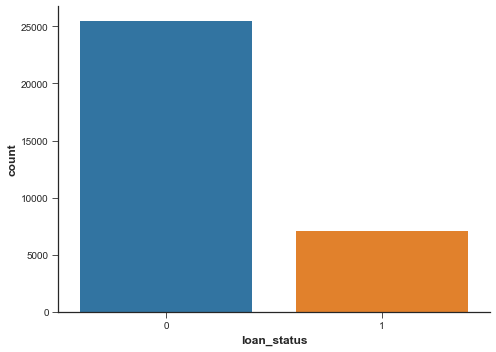

In [199]:
_=sns.countplot(x='loan_status',data=df)
sns.despine()

## Missing Data

In [200]:
#valores missing
missing = df.isna().sum()
missing[missing>0]

person_emp_length     895
loan_int_rate        3115
dtype: int64

In [201]:
#perc of missing:
for col in df.columns[df.isna().any()].to_list():
    n_missing =  df[col].isna().sum()
    perc_missing = n_missing/df[col].count()
    print('{} - missing values: {}, {:.2%} of the total'.format(col,n_missing,perc_missing))


person_emp_length - missing values: 895, 2.83% of the total
loan_int_rate - missing values: 3115, 10.57% of the total


Both columns have relatively small percentage of missing values. 

Let's take a look on the distribution of these features:

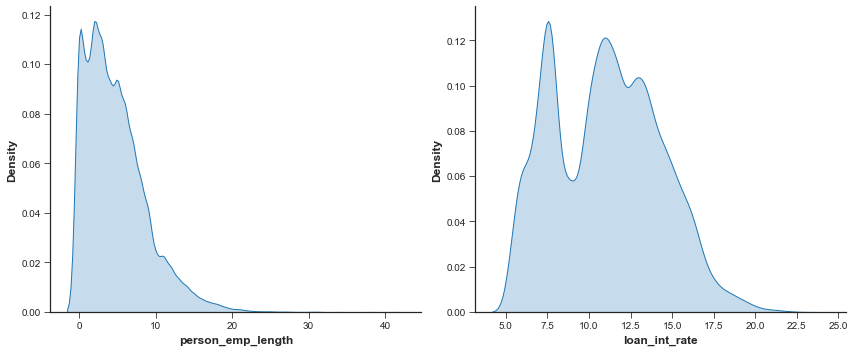

In [202]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
_=sns.kdeplot(df.dropna().person_emp_length,ax=ax1,shade=True)
_=sns.kdeplot(df.dropna().loan_int_rate,ax=ax2,shade=True)
sns.despine()

person_emp_length is skewd, so better impute with the median then the mean.  

Let's see the correlation between these variables and the target:

In [203]:
df[['loan_status','person_emp_length','loan_int_rate']].corr()

,loan_status,person_emp_length,loan_int_rate
loan_status,1.000000,-0.085966,0.335092
person_emp_length,-0.085966,1.000000,-0.058263
loan_int_rate,0.335092,-0.058263,1.000000


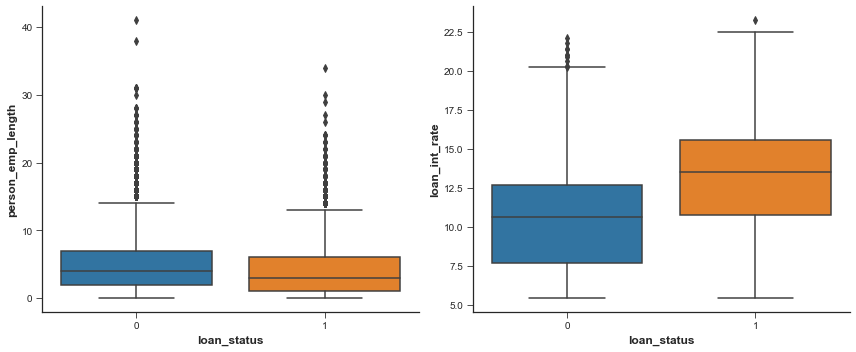

In [204]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.boxplot(x='loan_status',y='person_emp_length',data=df,ax=ax1)
sns.boxplot(x='loan_status',y='loan_int_rate',data=df,ax=ax2)
sns.despine()

The feature person_emp_lenght have a smaller correlation with the target than loan_int_rate.

A model will be scored using different techniques to test the impact on the model.

- Drop null rows;
- Imputation with the columns median (person_emp_length) and mean (loan_int_rate);

Only the numeric columns will be used in the evalution, for simplicity sake, and the model will be scored using F1 Score, since our target is unbalanced and the usual accuracy metric will be biased, while F1 Score takes in consideration precision and recall.

To avoid data leakage by calculating agregate statistics with the whole dataset, train and validadation datasets will be created, and used in all the analysis. The validation dataset contais 20% of the data.

In [205]:
X = df.drop('loan_status',axis=1)
y = df.loan_status

from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,stratify=y,random_state=14)

In [206]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


#function to compare different aproaches

def score_dataset(X_train,y_train,X_val,y_val):
    X_train = X_train.select_dtypes(exclude=['object','category'])
    X_val = X_val.select_dtypes(exclude=['object','category'])
    
    model = RandomForestClassifier(n_estimators = 50,random_state=14)
    model.fit(X_train,y_train)
    preds = model.predict(X_val)
    
    return f1_score(y_val,preds)

#### Drop observations with Nan's

In [207]:
df_train = pd.concat([X_train,y_train],axis=1)
df_val = pd.concat([X_val,y_val],axis=1)

drop_train = df_train.dropna()
drop_val = df_val.dropna()

drop_X_train, drop_y_train = drop_train.drop('loan_status',axis=1), drop_train.loan_status
drop_X_val, drop_y_val = drop_val.drop('loan_status',axis=1), drop_val.loan_status

print(drop_X_train.shape[0], drop_y_train.shape[0])
print(drop_X_val.shape[0], drop_y_val.shape[0])

22910 22910
5722 5722


In [208]:
print("Drop Nan's")
print('F1 Score:')
score1 = score_dataset(drop_X_train,drop_y_train,drop_X_val,drop_y_val)
print(score1)

Drop Nan's
F1 Score:
0.6548107615139079


#### Using the mean/median of the column

In [209]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

In [210]:
imp_mean = SimpleImputer(strategy='mean')
imp_median = SimpleImputer(strategy='median')

In [211]:
ct = make_column_transformer(
    (imp_mean, ['loan_int_rate']),       
    (imp_median, ['person_emp_length']),            
    remainder='drop')      


imputed_X_train = pd.DataFrame(ct.fit_transform(X_train),dtype='float') 
imputed_X_val = pd.DataFrame(ct.transform(X_val),dtype='float') 

imputed_X_train.columns = ['loan_int_rate','person_emp_length']
imputed_X_val.columns = ['loan_int_rate','person_emp_length']

imputed_X_train = pd.concat([imputed_X_train,X_train.drop(['loan_int_rate','person_emp_length'],axis=1).reset_index(drop=True)],axis=1)
imputed_X_val = pd.concat([imputed_X_val,X_val.drop(['loan_int_rate','person_emp_length'],axis=1).reset_index(drop=True)],axis=1)

In [212]:
print("Imputation")
print('F1 Score:')
score2 = score_dataset(imputed_X_train,y_train,imputed_X_val,y_val)
print(score2)

Imputation
F1 Score:
0.6719305171733123


As seen in the correlation table above, the loan_int_rate have a linear relationship with the loan grade.

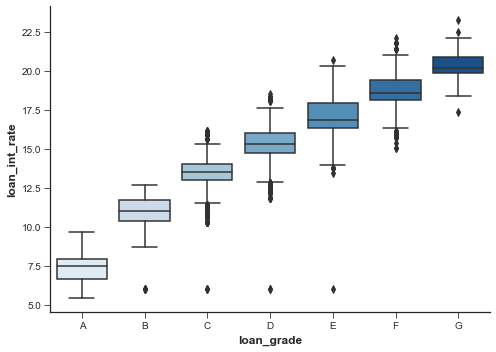

In [213]:
_ = sns.boxplot(x='loan_grade',y='loan_int_rate',data=df.sort_values(by='loan_grade'),palette='Blues')
sns.despine()

It would make more sense to impute the loan_int_rate missing values based on the mean of the loan grade, since this columns have no missing values. 

In [214]:
ct = make_column_transformer(
    (imp_median, ['person_emp_length']),            
     remainder='drop')     


imputed_X_train = pd.DataFrame(ct.fit_transform(X_train),dtype='float') 
imputed_X_val = pd.DataFrame(ct.transform(X_val),dtype='float') 

imputed_X_train.columns = ['person_emp_length']
imputed_X_val.columns = ['person_emp_length']

imputed_X_train = pd.concat([imputed_X_train,X_train.drop(['person_emp_length'],axis=1).reset_index(drop=True)],axis=1)
imputed_X_val = pd.concat([imputed_X_val,X_val.drop(['person_emp_length'],axis=1).reset_index(drop=True)],axis=1)

In [215]:
by_loan_grade = imputed_X_train.groupby('loan_grade')

In [216]:
by_loan_grade_mean = imputed_X_train.groupby('loan_grade').agg({'loan_int_rate':'mean'}).round(2)

In [217]:
d_by_loan_grade_mean = by_loan_grade_mean.to_dict()

In [218]:
def impute_mean(series):
    return series.fillna(series.mean())

In [219]:
imputed_X_train.loc[:,'loan_int_rate'] = by_loan_grade.loan_int_rate.transform(impute_mean).round(2)

In [220]:
for grade in df.loan_grade.unique():
    imputed_X_val.loc[imputed_X_val.loan_grade==grade,'loan_int_rate'] = imputed_X_val.loan_int_rate\
        .transform(lambda x: x.fillna(d_by_loan_grade_mean['loan_int_rate'][grade]))

In [221]:
print("Group Imputation")
print('F1 Score:')
score3 = score_dataset(imputed_X_train,y_train,imputed_X_val,y_val)
print(score3)

Group Imputation
F1 Score:
0.6752941176470588


Let's take a look in the F1 Scores calculated:

In [222]:
d = {"Drop Nan's":score1,'Simple Imputation':score2,'Simple Imputation + Group Imputation':score3}

In [223]:
pd.DataFrame.from_dict(d,orient='index',columns=['F1 Score']).round(4)

,F1 Score
Drop Nan's,0.6548
Simple Imputation,0.6719
Simple Imputation + Group Imputation,0.6753


The Simple Imputation + Group based imputation had the best performance. 
Let's take a look on the distribution of the variables after the treatment of missing values.

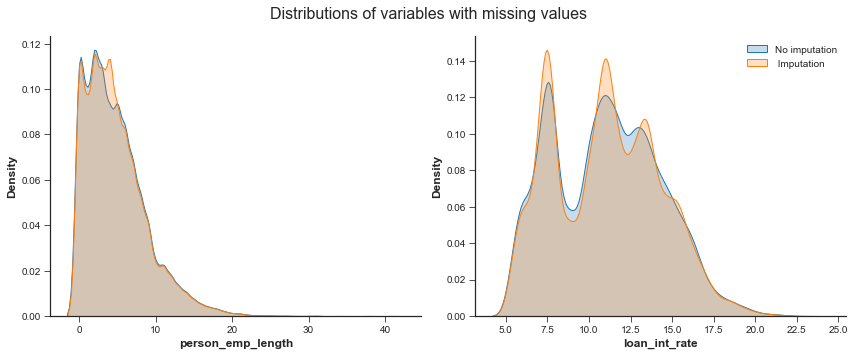

In [224]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

f.suptitle('Distributions of variables with missing values',fontsize=16)

_ = sns.kdeplot(df.dropna().person_emp_length,shade=True,label=True,ax=ax1)
_ = sns.kdeplot(pd.concat([imputed_X_train,imputed_X_val]).person_emp_length,shade=True,label=True,ax=ax1)
_ =plt.legend(['No imputation','Imputation'])
_ = plt.xlabel('person_emp_length')

_ = sns.kdeplot(df.dropna().loan_int_rate,shade=True,label=True,ax=ax2)
_ = sns.kdeplot(pd.concat([imputed_X_train,imputed_X_val]).loan_int_rate,shade=True,label=True,ax=ax2)
_ =plt.legend(['No imputation',' Imputation'])
_ = plt.xlabel('loan_int_rate')
sns.despine()

In [225]:
from scipy.stats import ks_2samp

In [226]:
ks_2samp(df.dropna().loan_int_rate,pd.concat([imputed_X_train,imputed_X_val]).loan_int_rate)

KstestResult(statistic=0.02027752555262527, pvalue=7.12146324470137e-06)

The KS test was used to compare the two distributions, with a statistics of 0.0203 we can reject the alternative hypotesis that the two distributions are different.

## Features Analysis

### Numerical Features

In [227]:
num_columns = [col for col in df.select_dtypes(['int','float']).columns]

In [228]:
num_columns.remove('loan_status')

In [229]:
num_columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

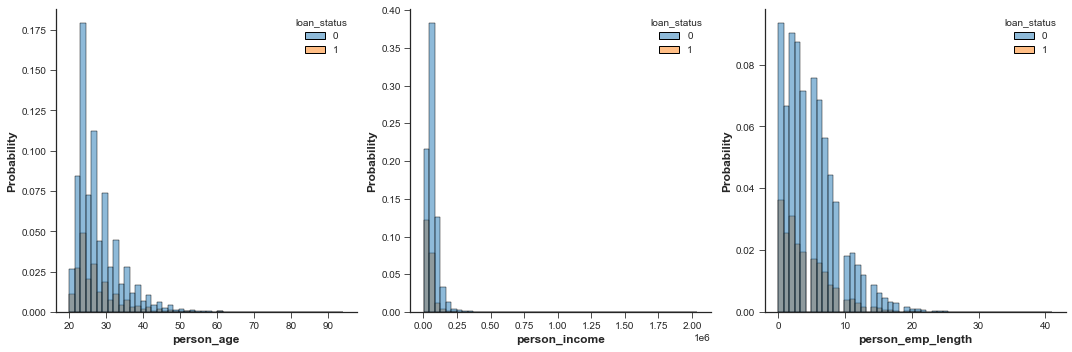

In [230]:
f,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,5))
sns.despine()
_=sns.histplot(data=df,x=num_columns[0],hue='loan_status',stat='probability',ax=ax1,bins=50)
_=sns.histplot(data=df,x=num_columns[1],hue='loan_status',stat='probability',ax=ax2,bins=50)
_=sns.histplot(data=df,x=num_columns[2],hue='loan_status',stat='probability',ax=ax3,bins=50)

-**person_age:** right skewed, with few observations in 50+ ages. create buckets for ages 

-**person_income:** right skewed, most people of the sample earn 250k or less. 


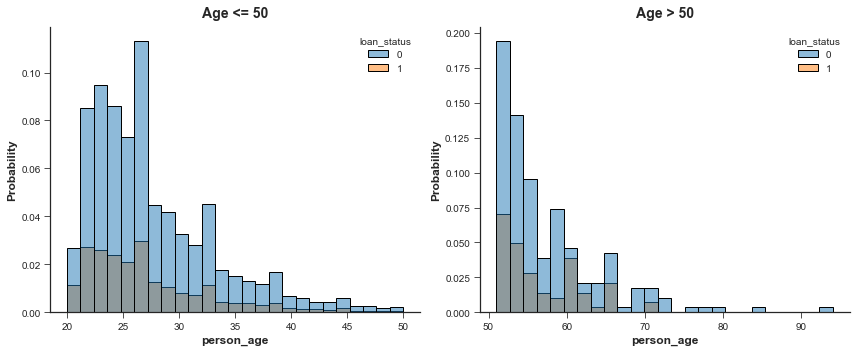

In [231]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.despine()

_=sns.histplot(data=df.query('person_age<=50'),x='person_age',hue='loan_status',stat='probability',ax=ax1,bins=25)
_=ax1.set_title('Age <= 50')

_=sns.histplot(data=df.query('person_age>50'),x='person_age',hue='loan_status',stat='probability',ax=ax2,bins=25)
_=ax2.set_title('Age > 50')

In [232]:
df.query('person_age<=50')['loan_status'].value_counts(normalize=True)

0    0.782168
1    0.217832
Name: loan_status, dtype: float64

In [233]:
df.query('person_age>50')['loan_status'].value_counts(normalize=True)

0    0.742049
1    0.257951
Name: loan_status, dtype: float64

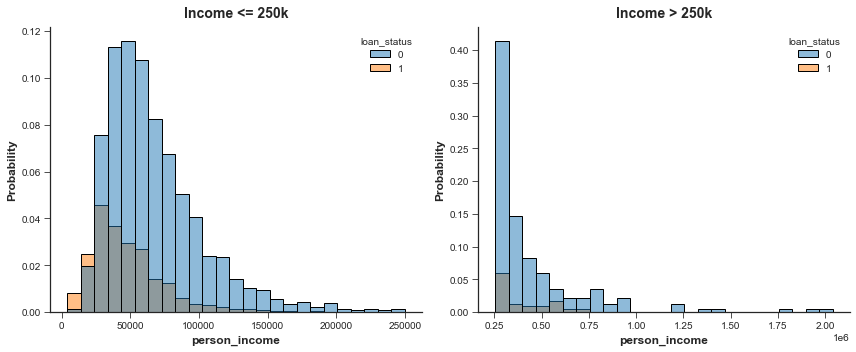

In [234]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.despine()

_=sns.histplot(data=df.query('person_income<=0.25e6'),x='person_income',hue='loan_status',stat='probability',ax=ax1,bins=25)
_=ax1.set_title('Income <= 250k')

_=sns.histplot(data=df.query('person_income>0.25e6'),x='person_income',hue='loan_status',stat='probability',ax=ax2,bins=25)
_=ax2.set_title('Income > 250k')

Observations with the lower income have more defaults.

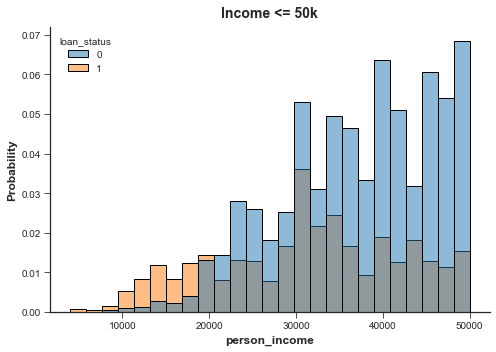

In [235]:
f,(ax1) = plt.subplots(1,1,figsize=(7,5))
sns.despine()

_=sns.histplot(data=df.query('person_income<=50e3'),x='person_income',hue='loan_status',stat='probability',ax=ax1,bins=25)
_=ax1.set_title('Income <= 50k')


In [236]:
df.query('person_income<=20e3')['loan_status'].value_counts(normalize=True)

1    0.754266
0    0.245734
Name: loan_status, dtype: float64

Observations with income of 20k year or less have 75% of default.

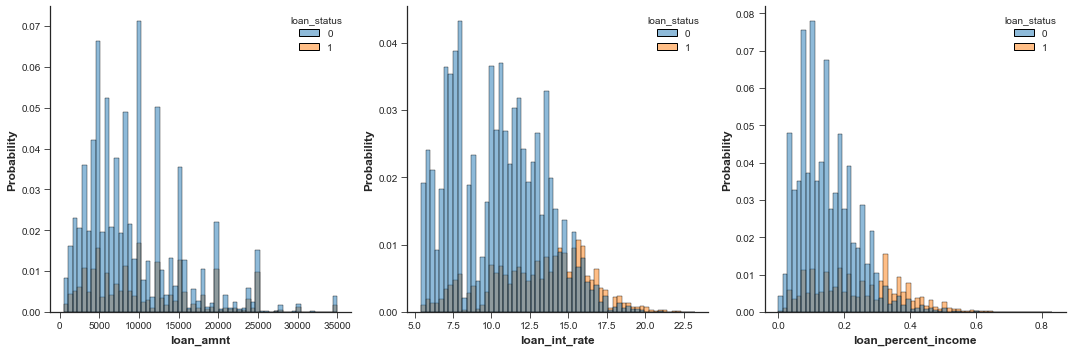

In [237]:
f,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,5))
sns.despine()
_=sns.histplot(data=df,x=num_columns[3],hue='loan_status',stat='probability',ax=ax1,bins=60)
_=sns.histplot(data=df,x=num_columns[4],hue='loan_status',stat='probability',ax=ax2,bins=60)
_=sns.histplot(data=df,x=num_columns[5],hue='loan_status',stat='probability',ax=ax3,bins=60)

**loan_percent_income:** loan_amnt/person income

In [238]:
df.query('loan_percent_income > 0.4').loan_status.value_counts(normalize=True)

1    0.741734
0    0.258266
Name: loan_status, dtype: float64

In 74% of the observations with loan_percent_income presented default.

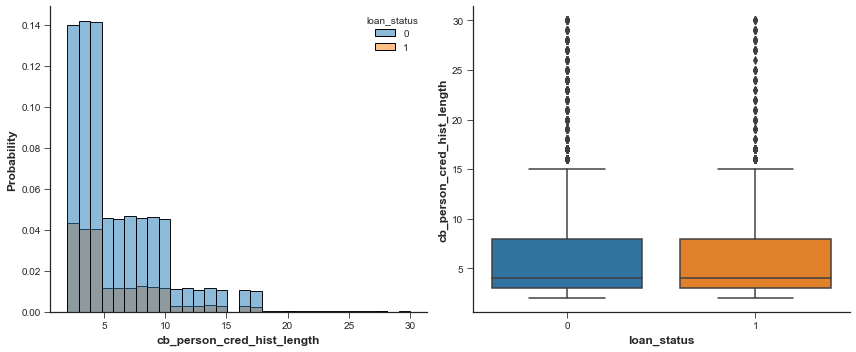

In [239]:
f,(ax1,ax2)= plt.subplots(1,2,figsize=(12,5))
sns.despine()
_=sns.histplot(data=df,x=num_columns[6],hue='loan_status',stat='probability',ax=ax1,bins=30)
_= sns.boxplot(x='loan_status',y='cb_person_cred_hist_length',data=df,ax=ax2)

In [240]:
df.groupby('loan_status').agg({'cb_person_cred_hist_length':'mean'})

,cb_person_cred_hist_length
loan_status,
0,5.837240
1,5.685381


Feature doesn't show relationship with the target.

### Categorical Features

In [241]:
cat_columns = [col for col in df.select_dtypes(['object']).columns]

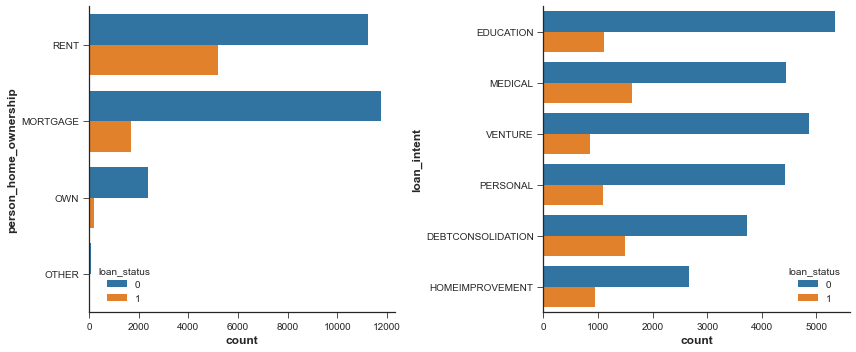

In [242]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.despine()
_=sns.countplot(y=cat_columns[0],data=df,hue='loan_status',orient='h',ax=ax1,order=['RENT','MORTGAGE','OWN','OTHER'])
_=sns.countplot(y=cat_columns[1],data=df,hue='loan_status',orient='h',ax=ax2,order=['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL',
                                                                                  'DEBTCONSOLIDATION','HOMEIMPROVEMENT'])
#_=plt.xticks(rotation = 45)

-**person_home_ownership:** the default counts is bigger in rent category than own and mortage. 

In [243]:
df.person_home_ownership.value_counts(normalize=True)

RENT        0.504758
MORTGAGE    0.412630
OWN         0.079327
OTHER       0.003285
Name: person_home_ownership, dtype: float64

In [244]:
df.query('person_home_ownership=="OTHER"')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
29,21,11389,OTHER,5.0,EDUCATION,C,4000,12.84,1,0.35,Y,2
566,26,19200,OTHER,0.0,PERSONAL,C,7500,11.97,1,0.39,Y,2
715,24,21000,OTHER,4.0,PERSONAL,B,6000,12.21,0,0.29,N,2
880,21,23000,OTHER,0.0,EDUCATION,B,2400,12.21,0,0.10,N,4
1308,22,25992,OTHER,6.0,DEBTCONSOLIDATION,B,3000,9.45,0,0.12,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
31443,44,83000,OTHER,2.0,EDUCATION,D,12000,16.00,1,0.14,Y,15
31915,42,600000,OTHER,2.0,EDUCATION,D,25000,14.74,0,0.04,N,11
32136,44,83000,OTHER,2.0,PERSONAL,D,12000,16.00,1,0.14,Y,12
32197,36,180000,OTHER,11.0,PERSONAL,B,20000,11.48,1,0.11,N,15


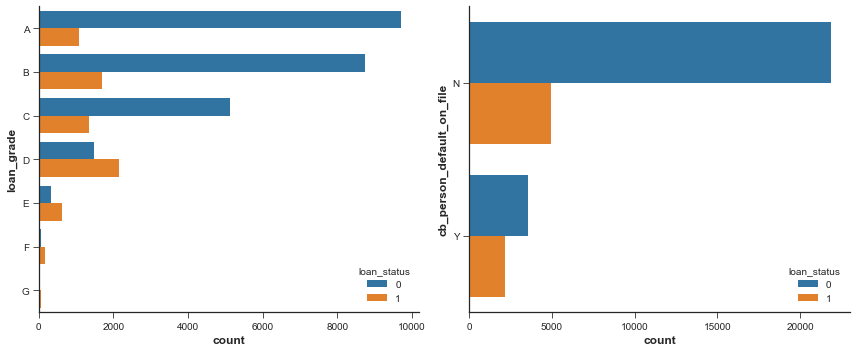

In [245]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.despine()
_=sns.countplot(y=cat_columns[2],data=df,hue='loan_status',order=['A','B','C','D','E','F','G'],orient='h',ax=ax1)
_=sns.countplot(y=cat_columns[3],data=df,hue='loan_status',orient='h',ax=ax2)
#_=plt.xticks(rotation = 45)

### Correlation Matrix

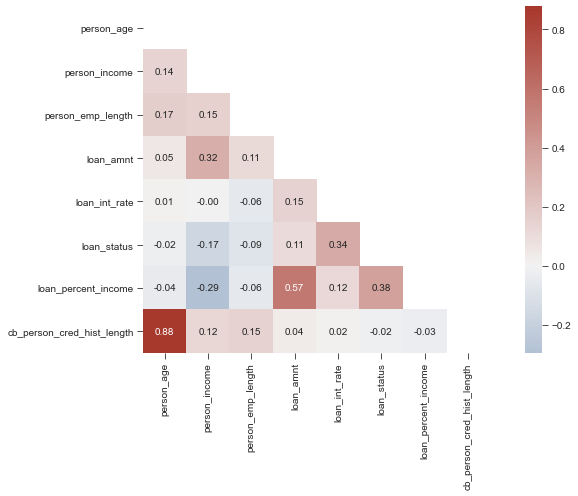

In [246]:
matrix = df.corr()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

plt.figure(figsize=(10, 7))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

plt.show();

### Bivariate Analysis

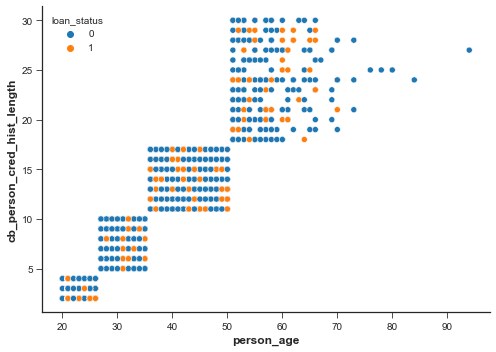

In [247]:
_=sns.scatterplot(data=df,x='person_age',y='cb_person_cred_hist_length',hue='loan_status')
sns.despine()

The bigger the age, we have higher values of credit history, but doesn't show a relation with the target.

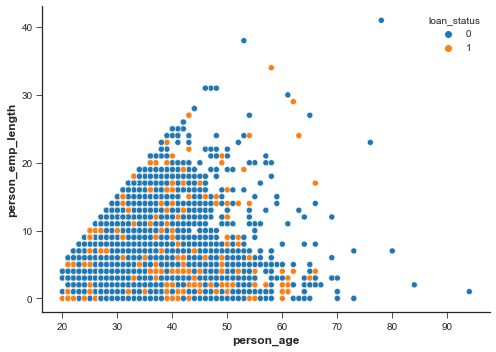

In [248]:
_=sns.scatterplot(data=df,x='person_age',y='person_emp_length',hue='loan_status')
sns.despine()

outliars

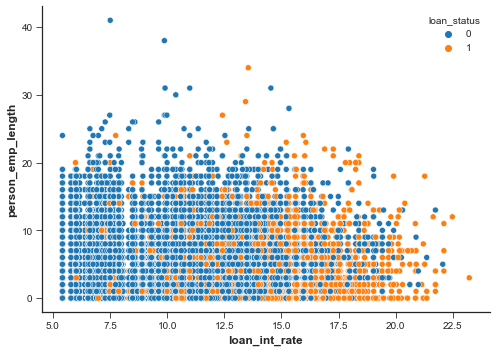

In [249]:
_=sns.scatterplot(data=df,x='loan_int_rate',y='person_emp_length',hue='loan_status')
sns.despine()

These two features doesn't seem to have a strong relationship, but, the bigger the loan interest rate, the number os default operations grows.

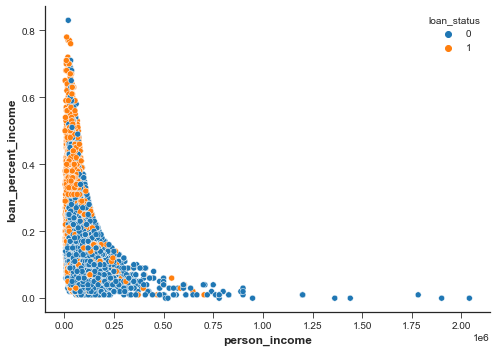

In [250]:
_=sns.scatterplot(data=df,x='person_income',y='loan_percent_income',hue='loan_status')
sns.despine()

Quanto maior a loan_grade, maior a loan_int_rate

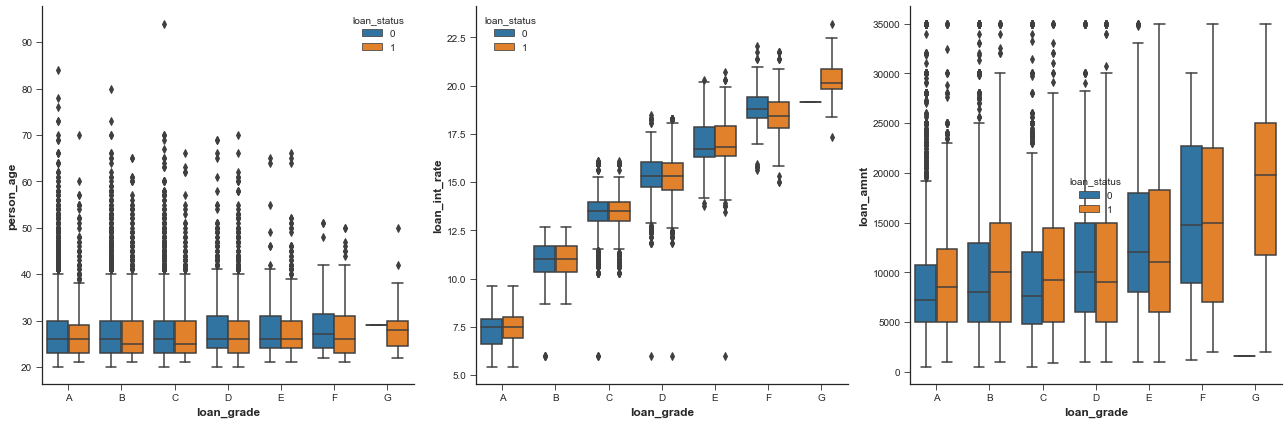

In [251]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,6))
_ = sns.boxplot(x='loan_grade',y='person_age',data=df.sort_values(by='loan_grade'),hue='loan_status',ax=ax1)
_ = sns.boxplot(x='loan_grade',y='loan_int_rate',data=df.sort_values(by='loan_grade'),hue='loan_status',ax=ax2)
_ = sns.boxplot(x='loan_grade',y='loan_amnt',data=df.sort_values(by='loan_grade'),hue='loan_status',ax=ax3)



sns.despine()

A taxa de juros aumenta linearmente com a nota do empréstimo.

Os box plots apresentam várias observações como outliars, segue a investigação de algumas, embora esses valores sejam esperados já que as distribuições das variáveis numéricas são muito assimétricas

In [252]:
#plot1
df.query('person_age>85 & loan_grade=="C"')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0,0.27,N,27


In [253]:
#plot1
df.query('loan_int_rate<7 & loan_grade=="B"')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2963,22,96000,RENT,4.0,EDUCATION,B,3150,6.0,0,0.03,N,2
4723,23,42000,MORTGAGE,8.0,MEDICAL,B,7600,6.0,0,0.18,N,2
7166,23,75000,RENT,2.0,PERSONAL,B,7000,6.0,0,0.09,N,3
22234,29,34000,RENT,2.0,DEBTCONSOLIDATION,B,6400,6.0,0,0.19,N,8
29759,36,37400,MORTGAGE,2.0,PERSONAL,B,6250,6.0,0,0.17,N,14


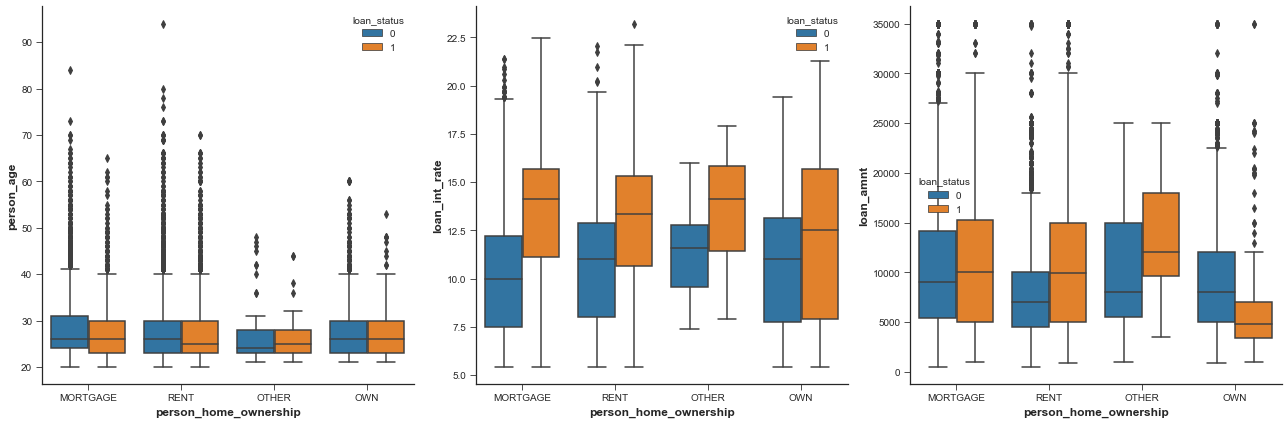

In [254]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,6))
_ = sns.boxplot(x='person_home_ownership',y='person_age',data=df.sort_values(by='loan_intent'),hue='loan_status',ax=ax1)
_ = sns.boxplot(x='person_home_ownership',y='loan_int_rate',data=df.sort_values(by='loan_intent'),hue='loan_status',ax=ax2)
_ = sns.boxplot(x='person_home_ownership',y='loan_amnt',data=df.sort_values(by='loan_intent'),hue='loan_status',ax=ax3)
 


sns.despine()

a relação mais obvia é entre o tipo de residência e a tx. juros.

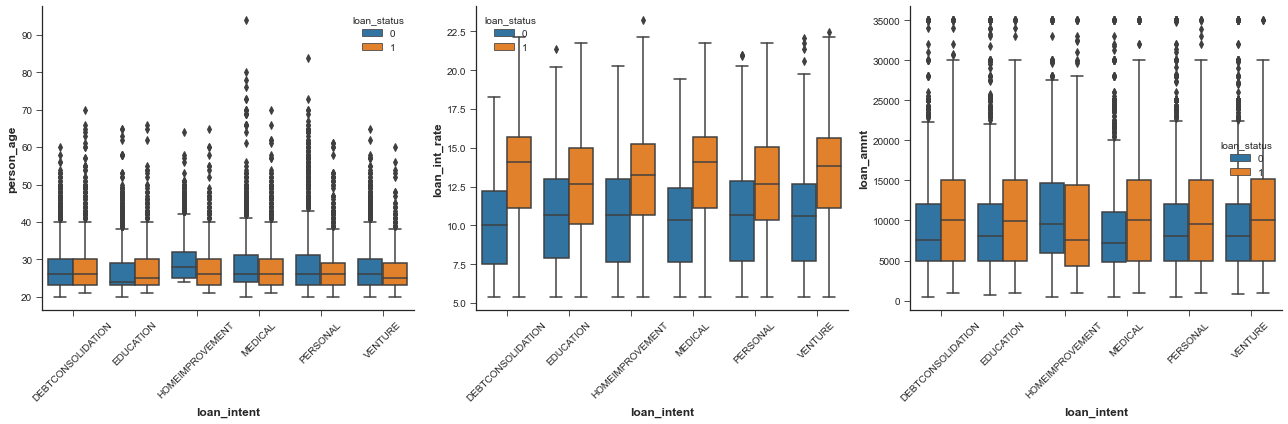

In [255]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,6))
_ = sns.boxplot(x='loan_intent',y='person_age',data=df.sort_values(by='loan_intent'),hue='loan_status',ax=ax1)
_ = sns.boxplot(x='loan_intent',y='loan_int_rate',data=df.sort_values(by='loan_intent'),hue='loan_status',ax=ax2)
_ = sns.boxplot(x='loan_intent',y='loan_amnt',data=df.sort_values(by='loan_intent'),hue='loan_status',ax=ax3)
ax1.tick_params(axis="x",rotation=45) 
ax2.tick_params(axis="x",rotation=45) 
ax3.tick_params(axis="x",rotation=45) 


sns.despine()

### Mutual Information

The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other.

The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. 

The scikit-learn algorithm for MI treats discrete features differently from continuous features.

Categoricals (object or categorial dtype) can be treated as discrete by giving them a label encoding. 

In [256]:
X_fact=imputed_X_train.copy()
for colname in X_fact.select_dtypes(["object", "category"]):
        X_fact[colname], _ = X_fact[colname].factorize()

In [257]:
X_fact.head()

,person_emp_length,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,3.0,23,132000,0,0,0,9600,7.14,0.07,0,3
1,5.0,23,33000,1,0,1,4800,14.54,0.15,1,3
2,0.0,22,50000,1,1,0,9200,6.92,0.18,0,4
3,4.0,21,20004,1,2,0,4500,8.00,0.22,0,2
4,31.0,47,178000,2,3,2,9000,10.99,0.05,0,17


In [258]:
discrete_features = X_fact.dtypes == int

In [259]:
discrete_features

person_emp_length             False
person_age                     True
person_income                  True
person_home_ownership          True
loan_intent                    True
loan_grade                     True
loan_amnt                      True
loan_int_rate                 False
loan_percent_income           False
cb_person_default_on_file      True
cb_person_cred_hist_length     True
dtype: bool

In [260]:
X_fact.person_emp_length = X_fact.person_emp_length.astype('int')

In [261]:
discrete_features = X_fact.dtypes == int
discrete_features

person_emp_length              True
person_age                     True
person_income                  True
person_home_ownership          True
loan_intent                    True
loan_grade                     True
loan_amnt                      True
loan_int_rate                 False
loan_percent_income           False
cb_person_default_on_file      True
cb_person_cred_hist_length     True
dtype: bool

In [262]:
from sklearn.feature_selection import mutual_info_classif


def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_fact, y_train,discrete_features=discrete_features)
mi_scores

person_income                 0.193077
loan_percent_income           0.083238
loan_int_rate                 0.074985
loan_grade                    0.074819
person_home_ownership         0.031476
loan_amnt                     0.029997
cb_person_default_on_file     0.014241
loan_intent                   0.008524
person_emp_length             0.006350
person_age                    0.002579
cb_person_cred_hist_length    0.000817
Name: MI Scores, dtype: float64

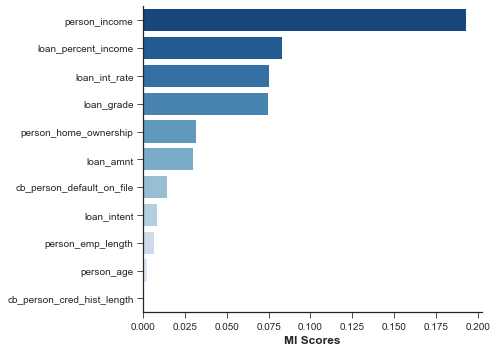

In [263]:
_=sns.barplot(y=mi_scores.index,x=mi_scores,orient='h',palette="Blues_r")
sns.despine()

The **most informative** feature was **person_income**, followed by **loan_percent_income**. 
The **least informative** one was **cb_person_cred_hist_lenghth**. 

But overall the MI scores are on the lower side, so at first all features are considered.

This clean dataset will be used on the next stage: **Feature Engineering**.

In [264]:
os.getcwd()

'/Users/mac/Documents/Python/CreditRisk'

In [265]:
df_train_clean = pd.concat([imputed_X_train,y_train.reset_index(drop=True)],axis=1)
df_val_clean = pd.concat([imputed_X_val,y_val.reset_index(drop=True)],axis=1)

In [266]:
df_train_clean.to_csv('Data/df_train_clean.csv',index=False)
df_val_clean.to_csv('Data/df_val_clean.csv',index=False)